<a href="https://colab.research.google.com/github/Anngladys/AGPLP/blob/main/Deep_Learning_with_TensorFlow_(CNN_on_MNIST).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)


Starting model training...
Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 52s 53ms/step - accuracy: 0.8797 - loss: 0.4050 - val_accuracy: 0.9815 - val_loss: 0.0558
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 52ms/step - accuracy: 0.9833 - loss: 0.0551 - val_accuracy: 0.9870 - val_loss: 0.0391
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 50ms/step - accuracy: 0.9878 - loss: 0.0374 - val_accuracy: 0.9900 - val_loss: 0.0308
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 48s 51ms/step - accuracy: 0.9919 - loss: 0.0264 - val_accuracy: 0.9905 - val_loss: 0.0290
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 85s 54ms/step - accuracy: 0.9936 - loss: 0.0210 - val_accuracy: 0.9892 - val_loss: 0.0314
Model training finished.

Evaluating model on test data...
313/313 - 3s - 11ms/step - accuracy: 0.9892 - loss: 0.0314
Test accuracy: 0.9892
Goal achieved: Test accuracy > 95%!


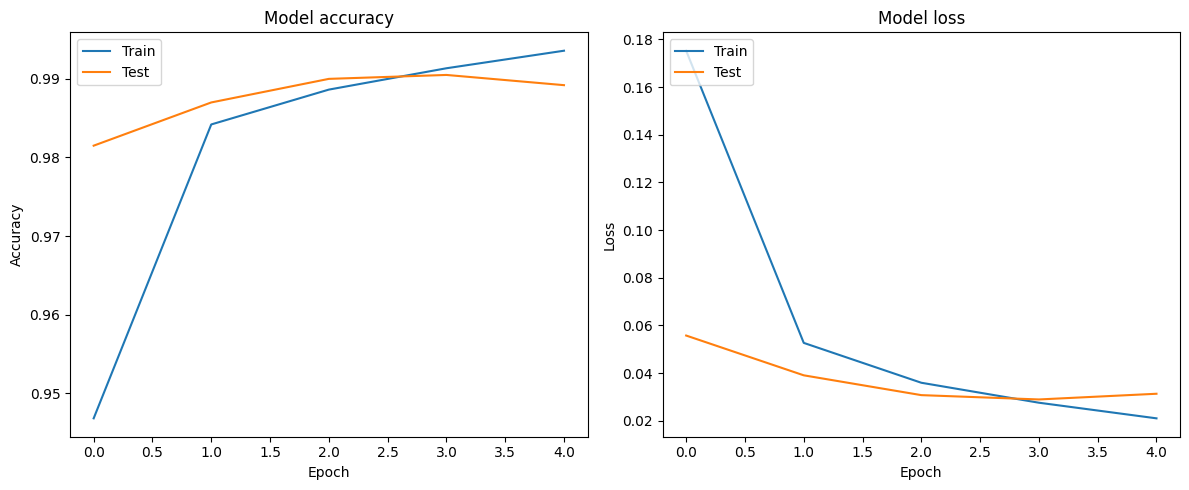


Visualizing predictions on 5 sample images...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


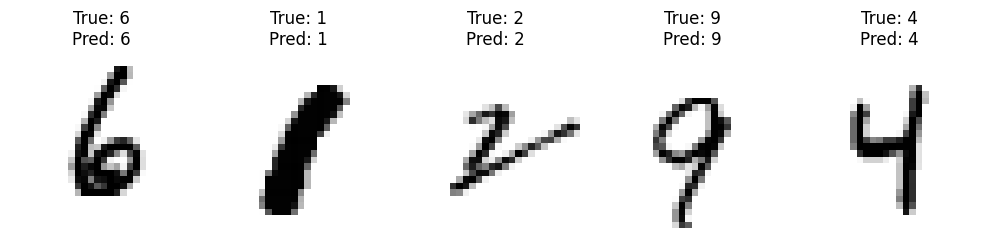

In [2]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

# Load and preprocess the MNIST dataset
# The MNIST dataset is readily available in Keras datasets
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Reshape images to include a channel dimension (for CNNs)
# Grayscale images have 1 channel
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# Convert labels to one-hot encoding
# This is required for categorical crossentropy loss
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

# Define the CNN model architecture
# Using a Sequential model for a straightforward stack of layers
model = models.Sequential()

# First Convolutional Block
# Conv2D layer with 32 filters, 3x3 kernel, ReLU activation
# Input shape is (28, 28, 1) for MNIST images
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# MaxPooling2D to reduce spatial dimensions, 2x2 pool size
model.add(layers.MaxPooling2D((2, 2)))

# Second Convolutional Block
# Conv2D layer with 64 filters, 3x3 kernel, ReLU activation
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Third Convolutional Block (optional, for deeper networks)
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flatten the output from convolutional layers to feed into dense layers
model.add(layers.Flatten())

# Dense (Fully Connected) Layers
# First dense layer with 64 units and ReLU activation
model.add(layers.Dense(64, activation='relu'))
# Output dense layer with 10 units (for 10 digits 0-9) and softmax activation
# Softmax ensures the output is a probability distribution over the classes
model.add(layers.Dense(10, activation='softmax'))

# Print the model summary to see the architecture and number of parameters
model.summary()

# Compile the model
# Optimizer: 'adam' is a good general-purpose optimizer
# Loss function: 'categorical_crossentropy' for one-hot encoded labels
# Metrics: 'accuracy' to monitor training and validation accuracy
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
# epochs: Number of passes over the entire dataset
# batch_size: Number of samples per gradient update
# validation_data: Data to evaluate the loss and any model metrics at the end of each epoch
print("\nStarting model training...")
history = model.fit(train_images, train_labels, epochs=5, batch_size=64,
                    validation_data=(test_images, test_labels))
print("Model training finished.")

# Evaluate the model on the test dataset
print("\nEvaluating model on test data...")
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

# Check if the accuracy goal is met
if test_acc > 0.95:
    print("Goal achieved: Test accuracy > 95%!")
else:
    print(f"Goal not met: Test accuracy is {test_acc*100:.2f}%, which is not > 95%. Consider more epochs or a different architecture.")


# Visualize training history (optional but good for debugging)
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.tight_layout()
plt.show()

# Visualize the model’s predictions on 5 sample images
print("\nVisualizing predictions on 5 sample images...")
# Get 5 random indices from the test set
random_indices = np.random.choice(test_images.shape[0], 5, replace=False)

plt.figure(figsize=(10, 6))
for i, idx in enumerate(random_indices):
    # Select an image and its true label
    sample_image = test_images[idx]
    true_label = np.argmax(test_labels[idx]) # Convert one-hot to integer

    # Make a prediction
    # model.predict returns probabilities, so use argmax to get the predicted class
    prediction = model.predict(sample_image.reshape(1, 28, 28, 1))
    predicted_label = np.argmax(prediction)

    # Display the image
    plt.subplot(1, 5, i + 1)
    # Squeeze removes the channel dimension for display
    plt.imshow(sample_image.squeeze(), cmap=plt.cm.binary)
    plt.title(f"True: {true_label}\nPred: {predicted_label}")
    plt.axis('off')
plt.tight_layout()
plt.show()